# Análisis Exploratorio de Datos con Pandas en Python
**Referencia**:[EDA](https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/)

EDA es la sigla en inglés para `Exploratory Data Analysis` y consiste en una de las primeras tareas que tiene que desempeñar el Científico de Datos. Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender «¿de qué se trata?», vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

OJO!, lo ideal es que tengamos un objetivo que nos hayan «adjuntado» con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen «**Queremos predecir ventas**», ó «**Clasificar casos malignos/benignos**», «**Queremos identificar audiencias que van a realizar re-compras**», «**queremos hacer pronóstico de fidelización de clientes/abandonos**», «**Quiero detectar casos de fraude en tiempo real**».

## EDA deconstruido

Al llegar un archivo, lo primero que deberíamos hacer es intentar responder:
- ¿Cuántos registros hay?
- ¿Son insufientes registros para lograr el objetivo?
- ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
- ¿Están todas las filas completas ó tenemos campos con valores nulos?

En caso que haya demasiados nulos: 
- ¿Queda el resto de información inútil?
- ¿Que datos son discretos y cuales continuos?
Muchas veces sirve obtener el tipo de datos: texto, int, double, float.

Si es un problema de tipo **supervisado**:
- ¿Cuál es la columna de «salida»? ¿binaria, multiclase?
- ¿Esta **balanceado** el conjunto salida?
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?
- ¿Siguen alguna distribución?
- ¿Hay correlación entre features?

En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo «Abogado» y «Abogadas», «avogado» pertenecerían todos a un mismo conjunto.

En problemas de tipo **TimeSeries**.
- ¿Estamos ante un problema dependiente del tiempo? 

Si fuera un problema de **Visión Artificial**: 
- **¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?**
- ¿Cuales son los Outliers? (**unos pocos datos aislados que difieren drásticamente del resto y «contaminan» ó desvían las distribuciones**)
- ¿Podemos eliminarlos? 
- ¿Es importante conservarlos?
- ¿son errores de carga o son reales?
- ¿Tenemos posible sesgo de datos? (**por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine**)

## ¿Qué sacamos del EDA?
El EDA será entonces una primer aproximación a los datos, `ATENCION`, si estamos mas o menos bien preparados y suponiendo una muestra de datos «suficiente», puede que en «unas horas» tengamos ya varias conclusiones como por ejemplo:

- Esto que quiere hacer el cliente CON ESTOS DATOS es una locura imposible! (esto ocurre la mayoría de las veces jeje)
- No tenemos datos suficientes ó son de muy mala calidad, pedir más al cliente.
- Un modelo de tipo Arbol es lo más recomendado usar (reemplazar Arbol, por el tipo de modelo que hayamos descubierto como mejor opción!)
- No hace falta usar Machine Learning para resolver lo que pide el cliente. (ESTO ES MUY IMPORTANTE!)
- **Es todo tan aleatorio que no habrá manera de detectar patrones**
- Hay datos suficientes y de buena calidad como para seguir a la próxima etapa.

A estas alturas podemos saber si nos están pidiendo algo viable ó si necesitamos más datos para comenzar.

Repito por si no quedó claro: el EDA debe tomar horas, ó puede que un día, pero la idea es poder sacar algunas conclusiones rápidas para contestar al cliente si podemos seguir o no con su propuesta.

## Técnicas para EDA

Vamos a lo práctico!, ¿Que herramientas tenemos hoy en día? La verdad es que como cada conjunto de datos suele ser único, el EDA se hace bastante «a mano», pero podemos seguir diversos pasos ordenados para intentar acercarnos a ese objetivo que nos pasa el cliente en pocas horas.

A nivel programación y como venimos utilizando Python, encontramos a la conocida librería Pandas, que nos ayudará a manipular datos, leer y transformarlos.

Otra de las técnicas que más nos ayudaran en el EDA es visualización de datos (que también podemos hacer con Pandas).

Finalmente podemos decir que nuestra Intuición -basada en Experiencia previa, no en corazonadas- y nuestro conocimiento de casos similares también nos pueden aportar pistas para saber si estamos ante datos de buena calidad. Por ejemplo si alguien quiere hacer reconocimiento de imágenes de tornillos y tiene 25 imágenes y con muy mala resolución podremos decir que no tenemos muestras suficientes -dado nuestro conocimiento previo de este campo-.

Vamos a la práctica!

## Un EDA de pocos minutos con Pandas (Python)

Vamos a hacer un ejemplo en pandas de un EDA bastante sencillo pero con fines educativos.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
 
url = '..\..\data\EDA-countries.csv'
df = pd.read_csv(url, sep=";")

print(df.head(5))

alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra              

Veamos los datos básicos que nos brinda pandas:
Nombre de columnas

In [17]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (252, 19)
Nombre columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


Columnas, nulos y tipo de datos

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
alpha_2                251 non-null object
alpha_3                252 non-null object
area                   252 non-null float64
capital                246 non-null object
continent              210 non-null object
currency_code          251 non-null object
currency_name          251 non-null object
eqivalent_fips_code    1 non-null object
fips                   249 non-null object
geoname_id             252 non-null int64
languages              249 non-null object
name                   252 non-null object
neighbours             165 non-null object
numeric                252 non-null int64
phone                  247 non-null object
population             252 non-null int64
postal_code_format     154 non-null object
postal_code_regex      152 non-null object
tld                    250 non-null object
dtypes: float64(1), int64(3), object(15)
memory usage: 37.5+ KB


En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.
descripción estadística de los datos numéricos

In [19]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Pandas filtra las features numéricas y calcula datos estadísticos que pueden ser útiles: cantidad, media, desvío estándar, valores máximo y mínimo.
Verifiquemos si hay correlación entre los datos

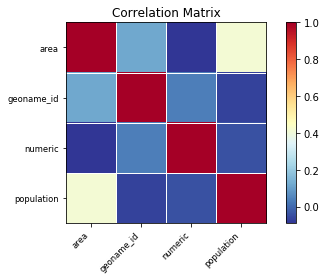

In [20]:
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación
Cargamos un segundo archivo csv para ahondar en el crecimiento de la población en los últimos años, filtramos a España y visualizamos

country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


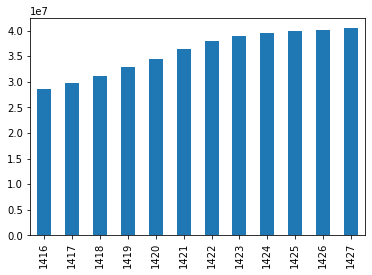

In [21]:
url = '..\..\data\EDA-countries-II.csv'

df_pop = pd.read_csv(url)
print(df_pop.head(5))

df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
print(df_pop_es.head())

df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

Crecimiento de la Población de España. El eje x no está establecido y aparece un id de fila.
Hagamos la comparativa con otro país, por ejemplo con el crecimiento poblacional en Argentina

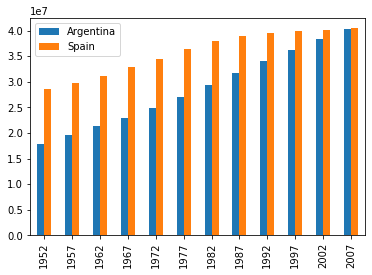

In [23]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]

anios = df_pop_es['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                        'Spain': pop_es}, 
                           index=anios)

df_plot.plot(kind='bar')

Gráfica comparativa de crecimiento poblacional entre España y Argentina entre los años 1952 al 2007
Ahora filtremos todos los paises hispano-hablantes

In [25]:
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]

df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


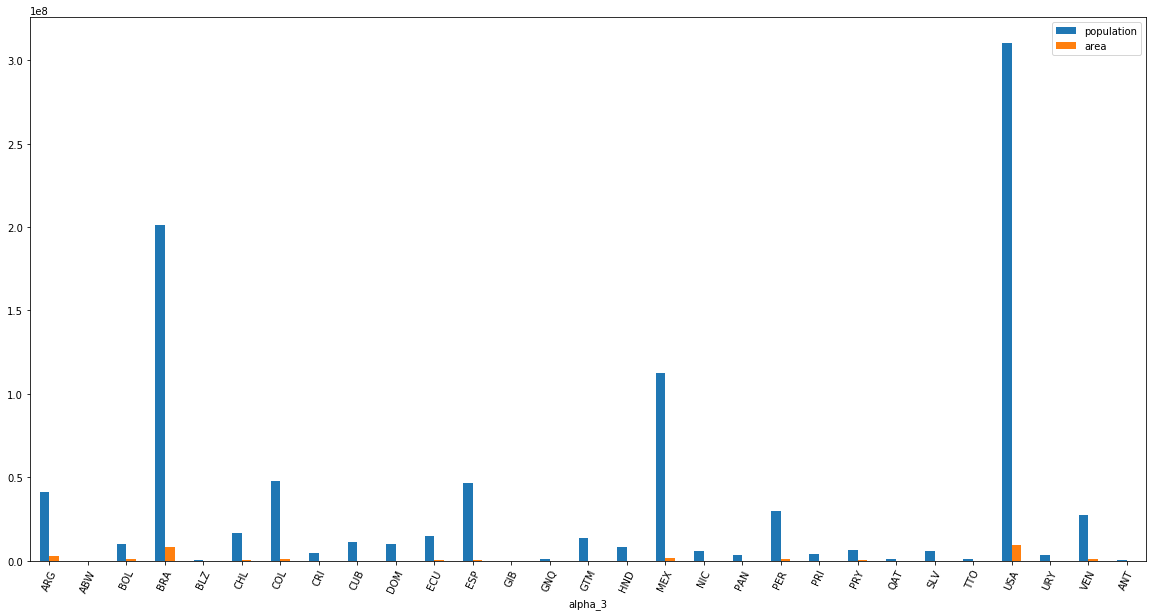

In [26]:
# VISUALIZAR
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

Vamos a hacer detección de **Outliers**, (con fines educativos) en este caso `definimos como limite superior (e inferior) la media más (menos) «2 veces la desviación estándar»` que muchas veces es tomada como máximos de tolerancia.

In [27]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row ## obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

Detectamos como outliers a Brasil y a USA. Los eliminamos y graficamos ordenado por población de menor a mayor.

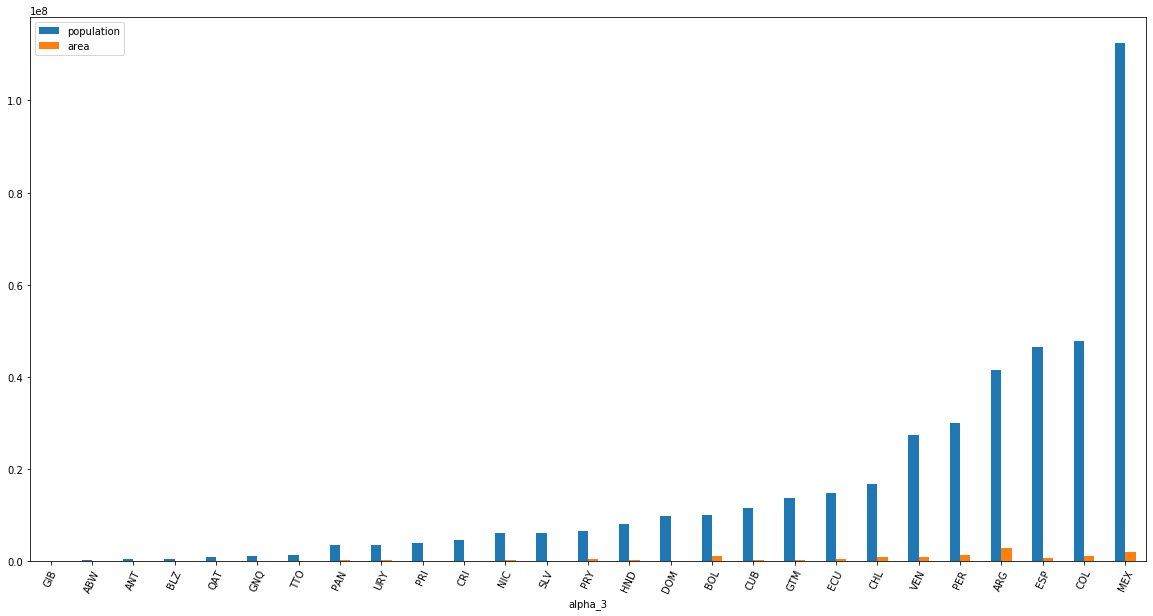

In [29]:
# Quitemos BRA y USA por ser outlies utilizando el INDEX VALUE y volvamos a graficar:
df_espanol.drop([30,233], inplace=True)
df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))

Así queda nuestra gráfica sin outliers 🙂

En pocos minutos hemos podido responder: cuántos datos tenemos, si hay nulos, los tipos de datos (entero, float, string), la correlación, hicimos visualizaciones, comparativas, manipulación de datos, detección de ouliers y volver a graficar. ¿No está nada mal, no?

## Más cosas! que se suelen hacer:

Otras pruebas y gráficas que se suelen hacer son:

Si hay **datos categóricos**, `agruparlos, contabilizarlos y ver su relación con las clases de salida gráficas de distribución en el tiempo`, por ejemplo si tuviéramos ventas, para tener una primera impresión sobre su estacionalidad.
**Rankings** del tipo «10 productos más vendidos» ó «10 ítems con más referencias por usuario».
**Calcular importancia de Features** y descartar las menos útiles.

## Conclusiones

En el artículo vimos un repaso sobre qué es y cómo lograr hacer un Análisis Exploratorio de Datos en pocos minutos. Su importancia es sobre todo la de darnos un vistazo sobre la calidad de datos que tenemos y hasta puede determinar la continuidad o no de un proyecto.

Siempre dependerá de los datos que tengamos, en cantidad y calidad y por supuesto nunca deberemos dejar de tener en vista **EL OBJETIVO**, el propósito que buscamos lograr. Siempre debemos apuntar a lograr eso con nuestras acciones.

Como resultado del EDA si determinamos continuar, pasaremos a una etapa en la que ya preprocesaremos los datos pensando en la entrada a un modelo (ó modelos!) de Machine Learning.